<a href="https://colab.research.google.com/github/jdmartinev/ArtificialIntelligenceIM/blob/main/Lecture04/notebooks/MiniTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
# pick the seed for reproducibility - change it to explore the effects of random variations
np.random.seed(0)
import random
from tqdm import tqdm

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Download and load the test data
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11454604.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 348060.07it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3106976.92it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4013172.27it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Example: Iterate over a few batches
for images, labels in trainloader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


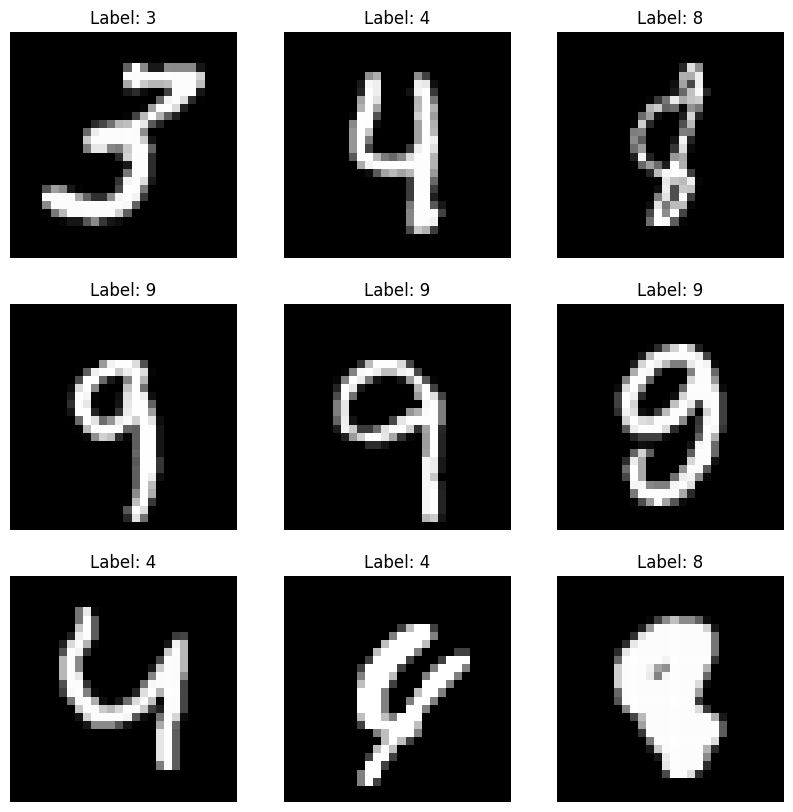

In [5]:
# Check some examples
for images, labels in trainloader:
    # Denormalize the images for plotting
    images = images * 0.5 + 0.5

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Plot 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i][0], cmap='gray')  # images[i][0] for grayscale images
        plt.title(f"Label: {labels[i].item()}")
        plt.axis('off')
    plt.show()
    break


# **Linear Layer Exercise**

In this exercise, you will implement a simple linear layer, commonly used in neural networks. The linear layer performs a linear transformation on the input data. You will be required to implement the forward pass, backward pass, and update equations for this layer.

## **Tasks**

You need to implement the following methods in the `Linear` class: `forward`, `backward`, and `update`.

### **Forward Pass**

In the forward pass, the linear layer computes the output as:

$$\mathbf{Z} = \mathbf{X} \mathbf{W} + \mathbf{b}$$

where:
- $\mathbf{X}$ is the input tensor of shape $(n_{\text{batch}}, n_{\text{in}})$
- $\mathbf{W}$ is the weight matrix of shape $(n_{\text{in}}, n_{\text{out}})$
- $\mathbf{b}$ is the bias vector of shape $(n_{\text{out}},)$
- $\mathbf{Z}$ is the output tensor of shape $(n_{\text{batch}}, n_{\text{out}})$

*Tip*: Move to self all the tensors needed to compute the gradient
### **Backward Pass**

In the backward pass, the gradients of the weights and biases are computed using the chain rule. Given the gradient of the loss with respect to the output $\mathbf{dZ}$, we compute:

$$\mathbf{dW} = \mathbf{X}^T \mathbf{dZ}$$
$$\mathbf{db} = \sum_{i=1}^{n_{\text{batch}}} \mathbf{dZ}_i$$
$$\mathbf{dX} = \mathbf{dZ} \mathbf{W}^T$$

where:
- $\mathbf{dZ}$ is the gradient of the loss with respect to the output, with shape $(n_{\text{batch}}, n_{\text{out}})$
- $\mathbf{dW}$ is the gradient of the loss with respect to the weights, with shape $(n_{\text{in}}, n_{\text{out}})$
- $\mathbf{db}$ is the gradient of the loss with respect to the biases, with shape $(n_{\text{out}},)$
- $\mathbf{dX}$ is the gradient of the loss with respect to the input, with shape $(n_{\text{batch}}, n_{\text{in}})$

### **Update**

In the update step, we adjust the weights and biases using the gradients computed during the backward pass and a learning rate \(\alpha\):

$$\mathbf{W} \leftarrow \mathbf{W} - \alpha \mathbf{dW}$$
$$\mathbf{b} \leftarrow \mathbf{b} - \alpha \mathbf{db}$$

where:
- $\alpha$ is the learning rate

## **Instructions**

1. **Forward Method**: Implement the forward pass by computing the linear transformation.
2. **Backward Method**: Implement the backward pass by computing the gradients of the weights, biases, and inputs.
3. **Update Method**: Implement the update step to adjust the weights and biases using the computed gradients and a given learning rate.

Make sure to test your implementation with various input sizes to ensure it works correctly.




In [6]:
class Linear:
    """
    A simple linear layer that performs a linear transformation.
    """
    def __init__(self, nin, nout, device="cpu"):
        """
        Initialize the linear layer with random weights and zero biases.

        Args:
            nin (int): Number of input features.
            nout (int): Number of output features.
            device (str): Device to store the tensors ('cpu' or 'cuda').
        """
        self.W = torch.randn(nin, nout, device=device, requires_grad=False)
        self.b = torch.zeros(nout, device=device, requires_grad=False)

    def forward(self, X):
        """
        Perform the forward pass of the linear layer.

        Args:
            X (torch.Tensor): Input tensor with shape (n_batch, nin).

        Returns:
            torch.Tensor: Output tensor with shape (n_batch, nout).
        """
        ###########YOUR CODE HERE################################
        self.X = X
        Z = #code
        return Z


    def backward(self, dZ):
        """
        Perform the backward pass of the linear layer.

        Args:
            dZ (torch.Tensor): Gradient of the loss with respect to the output of the linear layer.

        Returns:
            torch.Tensor: Gradient of the loss with respect to the input of the linear layer.
        """
        ###########YOUR CODE HERE################################
        self.dW = #code
        self.db = #code
        self.dX = #code
        return self.dX #What the net need to backpropagate

    def update(self, lr):
        """
        Update the weights and biases of the linear layer.

        Args:
            lr (float): Learning rate.
        """
        ###########YOUR CODE HERE################################
        self.W #code
        self.b #code

# Example usage
nin = 4
nout = 3
n_batch = 5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
# Simulated input tensor
X = torch.randn(n_batch, nin).to(device)

# Create an instance of the Linear class and compute the linear transformation
net = Linear(nin, nout, device=device)
Z = net.forward(X)
print(Z.shape)

torch.Size([5, 3])


# **Cross-Entropy Loss Exercise**

In this exercise, you will implement the cross-entropy loss function, commonly used in classification tasks within neural networks. The cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1. You will be required to implement the forward pass to compute the loss and the backward pass to compute the gradient of the loss with respect to the input logits.

## **Tasks**

You need to implement the following methods in the `CrossEntropyFromLogits` class: `forward` and `backward`.

### **Forward Pass**

In the forward pass, the class computes the softmax probabilities, the log softmax, and then the cross-entropy loss. Given the input tensor $\mathbf{Z}$ and the true labels $\mathbf{Y}$, both of size $(n_{batch},n_{classes})$ we perform the following steps:

1. **Softmax**: Compute the softmax probabilities:
$$\mathbf{A} = \text{softmax}(\mathbf{Z})$$

2. **Log Softmax**: Compute the log softmax:
$$\text{log_softmax_Z} = \log(\text{softmax}(\mathbf{Z}))$$

3. **Log Probabilities**: Gather the log probabilities corresponding to the true labels:
$$ \text{log_probs} = \text{log_softmax_Z}[\text{range}(n_{\text{batch}}), \mathbf{Y}] $$

4. **Cross-Entropy Loss**: Compute the cross-entropy loss:
$$ \text{loss} = -\frac{1}{n_{\text{batch}}} \sum_{i=1}^{n_{\text{batch}}} \text{log_probs}_i $$

where:
- $\mathbf{Z}$ is the input tensor with shape $(n_{\text{batch}}, n_{\text{classes}})$
- $\mathbf{Y}$ is the true labels tensor with shape $(n_{\text{batch}},)$
- $\mathbf{A}$ is the softmax probabilities with shape $(n_{\text{batch}}, n_{\text{classes}})$
- $\text{log_softmax_Z}$ is the log softmax tensor with shape $(n_{\text{batch}}, n_{\text{classes}})$
- $\text{log_probs}$ is the log probabilities tensor with shape $(n_{\text{batch}},)$
- $\text{loss} is the scalar cross-entropy loss

### **Backward Pass**

In the backward pass, we compute the gradient of the loss with respect to the input tensor $\mathbf{Z}$. Given the softmax probabilities $\mathbf{A}$ and the labels $\mathbf{Y}$, we compute:

$$\mathbf{dZ} = \mathbf{A} - \mathbf{Y}_{\text{one_hot}}$$

where:
- $\mathbf{dZ}$ is the gradient of the loss with respect to $\mathbf{Z}$, with shape $(n_{\text{batch}}, n_{\text{classes}})$
- $\mathbf{A}$ is the softmax probabilities with shape $(n_{\text{batch}}, n_{\text{classes}})$
- $\mathbf{Y}_{\text{one_hot}}$ is the one-hot encoded true labels with shape $(n_{\text{batch}}, n_{\text{classes}})$

The train loader returns labels as an array of size $n_{batch}$ where each value is an integer corresponding to the label of the sample. You need to one-hot-encode the labels.

## **Instructions**

1. **Forward Method**: Implement the forward pass by computing the softmax probabilities, log softmax, and cross-entropy loss.
2. **Backward Method**: Implement the backward pass by computing the gradient of the loss with respect to the input tensor $\mathbf{Z}$.

Make sure to test your implementation with various input sizes to ensure it works correctly.



In [145]:
class CrossEntropyFromLogits:
    """
    Class to perform the softmax operation.
    """

    def forward(self, Z, Y):
        """
        Perform the forward pass of the softmax function.

        Args:
            Z (torch.Tensor): Input tensor with shape (n_batch, n_classes).
            Y (torch.Tensor): True labels with shape (n_batch, n_classes).

        Returns:
            torch.Tensor: Cross-entropy loss
        """
        self.Y = Y
        # Compute the softmax probabilities (just for the backward)
        self.A = torch.nn.functional.softmax(Z, dim=1)

        # Compute log softmax
        log_softmax_Z = torch.nn.functional.log_softmax(Z, dim=1)

        # Gather the log probabilities corresponding to the true labels
        log_probs = log_softmax_Z[torch.arange(Z.size(0)), Y] #(n_batch,)

        # Compute the cross-entropy loss
        loss = #code

        return loss

    def backward(self, n_classes):
        """
        Perform the backward pass of the softmax function.

        Args:
            n_classes: Needed to one-hot-encode the labels

        Returns:
            torch.Tensor: Gradient of the loss with respect to the input tensor.
        """
        #########################YOUR CODE HERE#################################
        dZ = #code
        return dZ


# Example usage
nin = 4
nout = 3
n_batch = 5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
# Simulated input tensor
X = torch.randn(n_batch, nin).to(device)

# Create an instance of the Linear class and compute the linear transformation
net = Linear(nin, nout, device=device)
Z = net.forward(X)


CELoss = CrossEntropyFromLogits()
Y = torch.randint(0, nout, (n_batch,))
loss = CELoss.forward(Z, Y)
print(loss)

tensor(1.5930, device='cuda:0')


# **MNIST Classification**
In this exercise, you will implement the a simple network composed of a linear layer and the cross-entropy loss function computed from the output of the linear layer. This combination is commonly used as the last layer in classification tasks within neural networks.

We will use this implementation to train a model on the MNIST dataset, which consists of handwritten digits. The goal is to classify each image into one of the 10 digit classes (0-9).


In [ ]:
# Check if CUDA is available and set the device accordingly
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

# Define the number of input features and output classes
n_features = 784
n_classes = 10

# Initialize the network and loss function
net = Linear(n_features, n_classes, device=device)
CELoss = CrossEntropyFromLogits()

# Set the learning rate
learning_rate = 0.001

# List to store loss values for plotting
Loss = []

# Variables to accumulate accuracy
total_correct = 0
total_samples = 0

# Determine total number of batches
total_batches = len(trainloader)

# Training loop
for batch_idx, (images, labels) in enumerate(tqdm(trainloader, desc="Training Batches"), 1):
    # Flatten the images and move them to the device
    X = images.view(images.shape[0], -1).to(device)

    # Forward pass: Compute predicted logits
    Z = net.forward(X)

    # Move labels to the device
    Y = labels.to(device)

    # Compute the cross-entropy loss
    loss = CELoss.forward(Z, Y)

    # Append the loss to the list
    Loss.append(loss.detach().cpu().numpy())

    # Backward pass: Compute the gradients
    dZ = CELoss.backward(n_classes)
    dX = net.backward(dZ)

    # Update the network parameters
    net.update(learning_rate)

    # Compute the accuracy for the current batch
    _, predicted = torch.max(Z, 1)
    correct = (predicted == Y).sum().item()
    total_correct += correct
    total_samples += Y.size(0)

    # Print the loss and accuracy every 10% of the total batches
    if batch_idx % (total_batches // 10) == 0:
        accuracy = total_correct / total_samples
        tqdm.write(f"Batch {batch_idx}/{total_batches} - Loss: {loss.item():.4f}, Accumulated Accuracy: {accuracy:.4f}")

# Compute and print the final accumulated accuracy
accumulated_accuracy = total_correct / total_samples
print(f"Final Accumulated Accuracy: {accumulated_accuracy:.4f}")

# Plot the loss values
plt.plot(np.array(Loss))
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [148]:
# Testing loop
for batch_idx, (images, labels) in enumerate(tqdm(testloader, desc="Testing Batches"), 1):
    # Flatten the images and move them to the device
    X = images.view(images.shape[0], -1).to(device)

    # Forward pass: Compute predicted logits
    Z = net.forward(X)

    # Move labels to the device
    Y = labels.to(device)

    # Compute the accuracy for the current batch
    _, predicted = torch.max(Z, 1)
    correct = (predicted == Y).sum().item()
    total_correct += correct
    total_samples += Y.size(0)

    # Print the loss and accuracy every 10% of the total batches
    if batch_idx % (total_batches // 10) == 0:
        accuracy = total_correct / total_samples
        tqdm.write(f"Batch {batch_idx}/{total_batches}, Accumulated Accuracy: {accuracy:.4f}")

# Compute and print the final accumulated accuracy
accumulated_accuracy = total_correct / total_samples
print(f"Final Accumulated Accuracy: {accumulated_accuracy:.4f}")

Testing Batches:  68%|██████▊   | 107/157 [00:01<00:00, 79.93it/s]

Batch 93/938, Accumulated Accuracy: 0.7126


Testing Batches: 100%|██████████| 157/157 [00:01<00:00, 80.53it/s]

Final Accumulated Accuracy: 0.7196


## **Net Class Description**

The `Net` class represents a neural network, allowing you to add layers and perform forward and backward passes through these layers. This class manages the sequence of layers and their interactions during training.

### Class Methods

The constructor initializes an empty list called `layers` to hold the different layers of the network.

The add method appends a new layer to the network.

The forward method performs the forward pass through all layers in the network. It takes an input tensor $\mathbf{X} and sequentially applies each layer's forward method to it.

The backward method performs the backward pass through all layers in the network in reverse order. It takes the gradient of the loss with respect to the output $\mathbf{dZ}$ and sequentially applies each layer's backward method to it.

The update method updates the parameters of all layers in the network using a given learning rate $\alpha$.

## **Tasks**

You need to complete the implementation of the Net class by filling in the missing code for the forward, backward, and update methods.


In [172]:
class Net:
    def __init__(self):
        """
        Initialize the Net class.
        This constructor initializes an empty list to hold the layers of the network.
        """
        self.layers = []

    def add(self, layer):
        """
        Add a layer to the network.

        Args:
            layer: An instance of a layer (e.g., Linear) to be added to the network.
        """
        self.layers.append(layer)

    def forward(self, X):
        """
        Perform the forward pass through all layers of the network.

        Args:
            X: Input tensor to the network.

        Returns:
            The output tensor after passing through all the layers.
        """
        for layer in self.layers:
            X = #code
        return X

    def backward(self, dZ):
        """
        Perform the backward pass through all layers of the network.

        Args:
            dZ: Gradient of the loss with respect to the output of the network.

        Returns:
            The gradient of the loss with respect to the input of the network.
        """
        for layer in reversed(self.layers):
            dZ = #code
        return dZ

    def update(self, lr):
        """
        Update the parameters of all layers in the network using the given learning rate.

        Args:
            lr: Learning rate for updating the parameters.
        """
        for layer in self.layers:
            #code

In [173]:
# Check if CUDA is available and set the device accordingly
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Forcing the device to CPU (this line will override the previous check)
device = 'cpu'

# Define the number of input features and output classes
n_features = 784
n_classes = 10

# Initialize the network (assuming `Net` is a custom class that you've defined)
net = Net()

# Add a linear layer to the network with 784 input features and 1024 output features
net.add(Linear(n_features, 1024, device=device))

# Add another linear layer with 1024 input features and 10 output features
net.add(Linear(1024, n_classes, device=device))

# Initialize the custom cross-entropy loss function from logits
CEloss = CrossEntropyFromLogits()

In [ ]:
# Set the learning rate
learning_rate = 0.001

# List to store loss values for plotting
Loss = []

# Variables to accumulate accuracy
total_correct = 0
total_samples = 0

# Determine total number of batches
total_batches = len(trainloader)

# Training loop
for batch_idx, (images, labels) in enumerate(tqdm(trainloader, desc="Training Batches"), 1):
    # Flatten the images and move them to the device
    X = images.view(images.shape[0], -1).to(device)

    # Forward pass: Compute predicted logits
    Z = net.forward(X)

    # Move labels to the device
    Y = labels.to(device)

    # Compute the cross-entropy loss
    loss = CELoss.forward(Z, Y)

    # Append the loss to the list
    Loss.append(loss.detach().cpu().numpy())

    # Backward pass: Compute the gradients
    dZ = CELoss.backward(n_classes)
    dX = net.backward(dZ)

    # Update the network parameters
    net.update(learning_rate)

    # Compute the accuracy for the current batch
    _, predicted = torch.max(Z, 1)
    correct = (predicted == Y).sum().item()
    total_correct += correct
    total_samples += Y.size(0)

    # Print the loss and accuracy every 10% of the total batches
    if batch_idx % (total_batches // 10) == 0:
        accuracy = total_correct / total_samples
        tqdm.write(f"Batch {batch_idx}/{total_batches} - Loss: {loss.item():.4f}, Accumulated Accuracy: {accuracy:.4f}")

# Compute and print the final accumulated accuracy
accumulated_accuracy = total_correct / total_samples
print(f"Final Accumulated Accuracy: {accumulated_accuracy:.4f}")

# Plot the loss values
plt.plot(np.array(Loss))
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
# Testing loop
for batch_idx, (images, labels) in enumerate(tqdm(testloader, desc="Testing Batches"), 1):
    # Flatten the images and move them to the device
    X = images.view(images.shape[0], -1).to(device)

    # Forward pass: Compute predicted logits
    Z = net.forward(X)

    # Move labels to the device
    Y = labels.to(device)

    # Compute the accuracy for the current batch
    _, predicted = torch.max(Z, 1)
    correct = (predicted == Y).sum().item()
    total_correct += correct
    total_samples += Y.size(0)

    # Print the loss and accuracy every 10% of the total batches
    if batch_idx % (total_batches // 10) == 0:
        accuracy = total_correct / total_samples
        tqdm.write(f"Batch {batch_idx}/{total_batches}, Accumulated Accuracy: {accuracy:.4f}")

# Compute and print the final accumulated accuracy
accumulated_accuracy = total_correct / total_samples
print(f"Final Accumulated Accuracy: {accumulated_accuracy:.4f}")

## **ReLU Activation Layer Exercise**

In this exercise, you will implement the ReLU (Rectified Linear Unit) activation function, commonly used in neural networks. ReLU introduces non-linearity into the model, which helps the network learn complex patterns. You will be required to implement the forward pass to apply the ReLU function and the backward pass to compute the gradient of the loss with respect to the input.

### Class Methods

#### `ReLU`
The `ReLU` class represents the ReLU activation function, containing methods to perform the forward and backward passes.

#### `forward`
The `forward` method applies the ReLU activation function element-wise to the input tensor \(\mathbf{Z}\).

### **Tasks**

You need to complete the implementation of the ReLU class by filling in the missing code for the forward and backward methods.


In [186]:
class ReLU:
    """
    ReLU activation layer.
    """

    def forward(self, Z):
        """
        Perform the forward pass of the ReLU activation function.

        Args:
            X (torch.Tensor): Input tensor.

        Returns:
            torch.Tensor: Output tensor with ReLU applied element-wise.
        """
        self.A = #code
        return self.A

    def backward(self, dA):
        """
        Perform the backward pass of the ReLU activation function.

        Args:
            dA (torch.Tensor): Gradient of the loss with respect to the output.

        Returns:
            torch.Tensor: Gradient of the loss with respect to the input.
        """
        dZ = #code
        return dZ

    def update(self,lr):
        """
        ReLU does not have any parameters to update.
        """
        pass


In [187]:
# Check if CUDA is available and set the device accordingly
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Forcing the device to CPU (this line will override the previous check)
device = 'cpu'

# Define the number of input features and output classes
n_features = 784
n_classes = 10

# Initialize the network (assuming `Net` is a custom class that you've defined)
net = Net()

# Add a linear layer to the network with 784 input features and 1024 output features
net.add(Linear(n_features, 1024, device=device))

# Add a non-linear activation function
net.add(ReLU())

# Add another linear layer with 1024 input features and 10 output features
net.add(Linear(1024, n_classes, device=device))

# Initialize the custom cross-entropy loss function from logits
CEloss = CrossEntropyFromLogits()

In [ ]:
# Set the learning rate
learning_rate = 0.001

# List to store loss values for plotting
Loss = []

# Variables to accumulate accuracy
total_correct = 0
total_samples = 0

# Determine total number of batches
total_batches = len(trainloader)

# Training loop
for batch_idx, (images, labels) in enumerate(tqdm(trainloader, desc="Training Batches"), 1):
    # Flatten the images and move them to the device
    X = images.view(images.shape[0], -1).to(device)

    # Forward pass: Compute predicted logits
    Z = net.forward(X)

    # Move labels to the device
    Y = labels.to(device)

    # Compute the cross-entropy loss
    loss = CELoss.forward(Z, Y)

    # Append the loss to the list
    Loss.append(loss.detach().cpu().numpy())

    # Backward pass: Compute the gradients
    dZ = CELoss.backward(n_classes)
    dX = net.backward(dZ)

    # Update the network parameters
    net.update(learning_rate)

    # Compute the accuracy for the current batch
    _, predicted = torch.max(Z, 1)
    correct = (predicted == Y).sum().item()
    total_correct += correct
    total_samples += Y.size(0)

    # Print the loss and accuracy every 10% of the total batches
    if batch_idx % (total_batches // 10) == 0:
        accuracy = total_correct / total_samples
        tqdm.write(f"Batch {batch_idx}/{total_batches} - Loss: {loss.item():.4f}, Accumulated Accuracy: {accuracy:.4f}")

# Compute and print the final accumulated accuracy
accumulated_accuracy = total_correct / total_samples
print(f"Final Accumulated Accuracy: {accumulated_accuracy:.4f}")

# Plot the loss values
plt.plot(np.array(Loss))
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
# Testing loop
for batch_idx, (images, labels) in enumerate(tqdm(testloader, desc="Testing Batches"), 1):
    # Flatten the images and move them to the device
    X = images.view(images.shape[0], -1).to(device)

    # Forward pass: Compute predicted logits
    Z = net.forward(X)

    # Move labels to the device
    Y = labels.to(device)

    # Compute the accuracy for the current batch
    _, predicted = torch.max(Z, 1)
    correct = (predicted == Y).sum().item()
    total_correct += correct
    total_samples += Y.size(0)

    # Print the loss and accuracy every 10% of the total batches
    if batch_idx % (total_batches // 10) == 0:
        accuracy = total_correct / total_samples
        tqdm.write(f"Batch {batch_idx}/{total_batches}, Accumulated Accuracy: {accuracy:.4f}")

# Compute and print the final accumulated accuracy
accumulated_accuracy = total_correct / total_samples
print(f"Final Accumulated Accuracy: {accumulated_accuracy:.4f}")